# <center><u> Exploratory Data Analysis</u> </center>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:

df= pd.read_csv("/content/data.csv")

In [ ]:

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:

df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:

df.drop(["Engine Fuel Type","Market Category","Vehicle Style","Popularity","Number of Doors","Vehicle Size"],axis=1,inplace=True)

In [ ]:

df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
rename_cols = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", 
               "Driven_Wheels": "Drive Mode","highway MPG": "MPG_H", "city mpg": "MPG-C", "MSRP": "Price" }

In [ ]:

df2=df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", 
               "Driven_Wheels": "Drive Mode","highway MPG": "MPG_H", "city mpg": "MPG-C", "MSRP": "Price" })


In [ ]:

df2.head()


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:

df2.agg('count')


Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG_H           11914
MPG-C           11914
Price           11914
dtype: int64

In [ ]:

df2.duplicated()
df3=df2.drop_duplicates()

In [ ]:

df3.agg('count')

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG_H           10925
MPG-C           10925
Price           10925
dtype: int64

In [ ]:

df3.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG_H            0
MPG-C            0
Price            0
dtype: int64

In [ ]:

df4=df3.dropna()

In [ ]:

df4.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG_H           0
MPG-C           0
Price           0
dtype: int64

In [ ]:

df4.describe()

,Year,HP,Cylinders,MPG_H,MPG-C,Price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


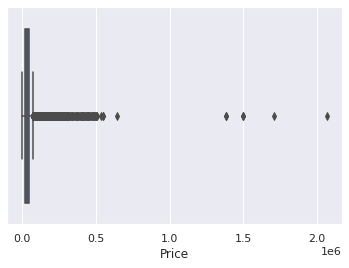

In [ ]:

sns.boxplot(x=df4['Price'])

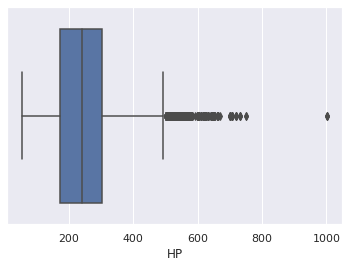

In [ ]:

sns.boxplot(x=df4['HP'])

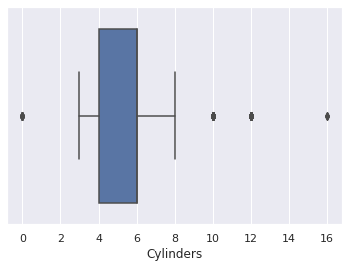

In [ ]:

sns.boxplot(x=df4['Cylinders'])

In [ ]:

df4.loc[:,df4.dtypes!=object]

,Year,HP,Cylinders,MPG_H,MPG-C,Price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


In [ ]:

l=list(df4.loc[:, df4.dtypes != object].columns)
l

['Year', 'HP', 'Cylinders', 'MPG_H', 'MPG-C', 'Price']

In [ ]:

Q1=df4.quantile(0.25)
Q3=df4.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR

Year             9.0
HP             130.0
Cylinders        2.0
MPG_H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64

In [ ]:

z=np.abs(stats.zscore(df4.loc[:, df4.dtypes != object]))
z

array([[0.01474274, 0.73242469, 0.17438565, 0.04105891, 0.04931418,
        0.05846284],
       [0.01474274, 0.41376913, 0.17438565, 0.22545477, 0.04931418,
        0.02959072],
       [0.01474274, 0.41376913, 0.17438565, 0.22545477, 0.10121432,
        0.09862087],
       ...,
       [0.15700625, 0.41376913, 0.17438565, 0.44082944, 0.50089968,
        0.13046289],
       [0.29926976, 0.41376913, 0.17438565, 0.44082944, 0.50089968,
        0.13527894],
       [0.69657482, 0.30548199, 0.17438565, 0.04105891, 0.35037118,
        0.21669452]])

In [ ]:

threshold = 3
df5= df4[(z < threshold).all(axis=1)]
df5

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [ ]:
df.shape



(11914, 10)

In [ ]:
df2.shape

(11914, 10)

In [ ]:
df3.shape

(10925, 10)

In [ ]:
df4.shape

(10827, 10)

In [ ]:
df5.shape

(10338, 10)

In [ ]:

top_makers= df5.Make.value_counts()
top_makers


Chevrolet        1015
Ford              778
Toyota            587
Volkswagen        547
Nissan            538
Dodge             492
GMC               475
Honda             403
Cadillac          394
Mazda             392
Suzuki            338
Infiniti          326
Audi              315
BMW               312
Mercedes-Benz     308
Hyundai           253
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             194
Chrysler          185
Buick             184
Pontiac           163
Lincoln           147
Porsche           132
Land Rover        126
Oldsmobile        111
Saab              101
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Aston Martin       32
Ferrari            28
Lotus              28
Lamborghini        17
Bentley            17
HUMMER             17
Alfa Romeo          5
Genesis             3
Spyker              2
McLaren             1
Name: Make, dtype: int64

([<matplotlib.patches.Wedge at 0x7f810823f250>,
 [Text(-1.0480870737971422, -0.33393634983233583, 'Chevrolet'),
  Text(-0.7232362145779478, -0.8288120280998345, 'Ford'),
  Text(-0.3278793493926656, -1.0499976820173664, 'Toyota'),
  Text(0.04611660549846505, -1.0990328742568618, 'Volkswagen'),
  Text(0.39947352090933363, -1.024900437160752, 'Nissan'),
  Text(0.6956500294438559, -0.852098020496916, 'Dodge'),
  Text(0.9126385654455389, -0.6140772336290516, 'GMC'),
  Text(1.0422527326630315, -0.3517232452603094, 'Honda'),
  Text(1.096188990366327, -0.09148605030086582, 'Cadillac'),
  Text(1.0867122105516767, 0.17045988219486924, 'Mazda'),
  Text(1.0225768538691455, 0.40538448161107554, 'Suzuki'),
  Text(0.9205847295306356, 0.6020994566971528, 'Infiniti'),
  Text(0.7866306360463957, 0.7689032724818142, 'Audi'),
  Text(0.6267744318045109, 0.9039656031266525, 'BMW'),
  Text(0.44637181575067053, 1.0053617269935482, 'Mercedes-Benz'),
  Text(0.2693347457832407, 1.0665171328740468, 'Hyundai'),
  

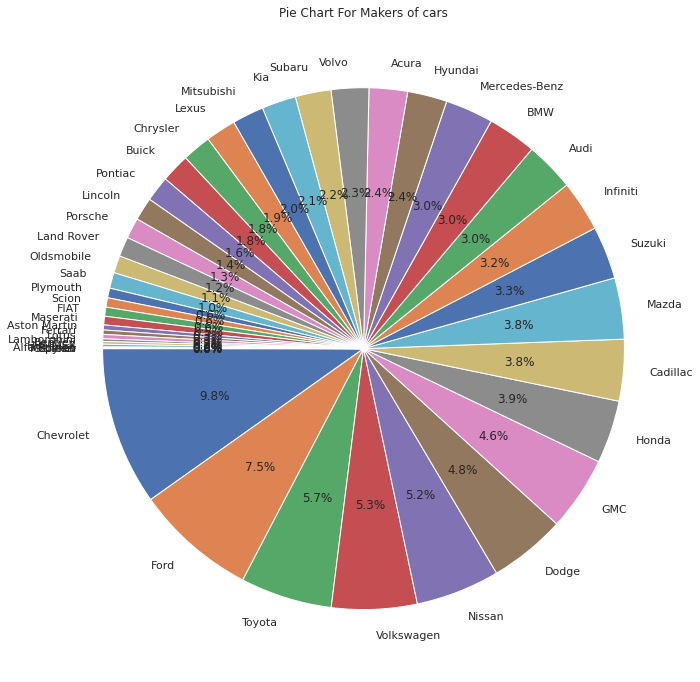

In [ ]:

plt.figure(figsize =(36,12))
plt.title('Pie Chart For Makers of cars')
plt.pie(top_makers , labels = top_makers.index, autopct = '%1.1f%%', startangle = 180, shadow = False)


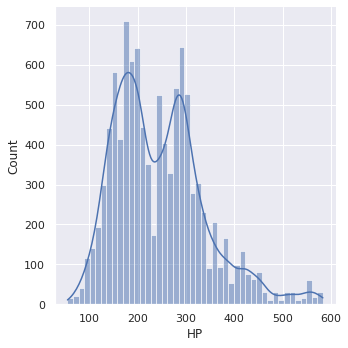

In [ ]:

sns.displot(df5.HP, kde=True, color='b')
plt.show()

In [ ]:

df5.columns


Index(['Make', 'Model', 'Year', 'HP', 'Cylinders', 'Transmission',
       'Drive Mode', 'MPG_H', 'MPG-C', 'Price'],
      dtype='object')

In [ ]:
feature=['Year', 'HP', 'Cylinders','MPG_H', 'MPG-C', 'Price']
       

In [ ]:
list(enumerate(feature))

[(0, 'Year'),
 (1, 'HP'),
 (2, 'Cylinders'),
 (3, 'MPG_H'),
 (4, 'MPG-C'),
 (5, 'Price')]

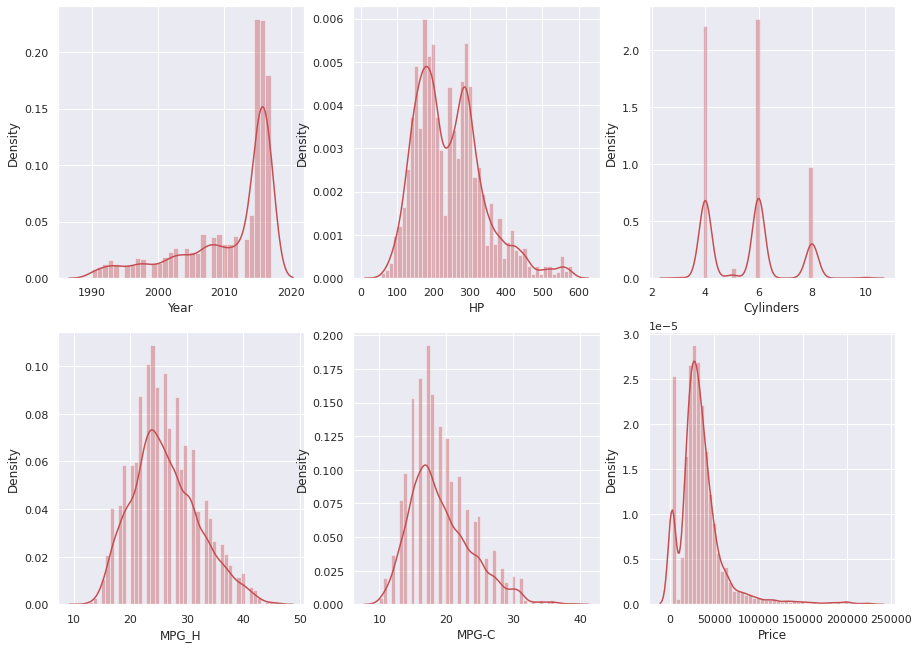

In [ ]:
plt.figure(figsize =(15,11))
for i in enumerate(feature):
  plt.subplot(2,3,i[0]+1)
  sns.distplot(df5[i[1]],kde=True, color='r')

(array([6.270e+02, 5.800e+01, 3.080e+02, 1.850e+02, 5.380e+02, 2.410e+02,
        3.920e+02, 2.020e+02, 2.800e+01, 5.000e+00, 5.870e+02, 1.000e+00,
        1.630e+02, 2.330e+02, 4.750e+02, 2.530e+02, 6.200e+01, 4.030e+02,
        1.110e+02, 3.380e+02, 7.780e+02, 3.940e+02, 2.190e+02, 1.700e+01,
        1.015e+03, 4.920e+02, 3.760e+02, 5.470e+02, 2.000e+00, 1.840e+02,
        2.460e+02, 5.500e+01, 1.260e+02, 2.800e+01, 1.940e+02, 3.260e+02,
        6.000e+01, 3.000e+00, 1.700e+01, 4.900e+01]),
 array([ 0.   ,  1.075,  2.15 ,  3.225,  4.3  ,  5.375,  6.45 ,  7.525,
         8.6  ,  9.675, 10.75 , 11.825, 12.9  , 13.975, 15.05 , 16.125,
        17.2  , 18.275, 19.35 , 20.425, 21.5  , 22.575, 23.65 , 24.725,
        25.8  , 26.875, 27.95 , 29.025, 30.1  , 31.175, 32.25 , 33.325,
        34.4  , 35.475, 36.55 , 37.625, 38.7  , 39.775, 40.85 , 41.925,
        43.   ]),
 <a list of 40 Patch objects>)

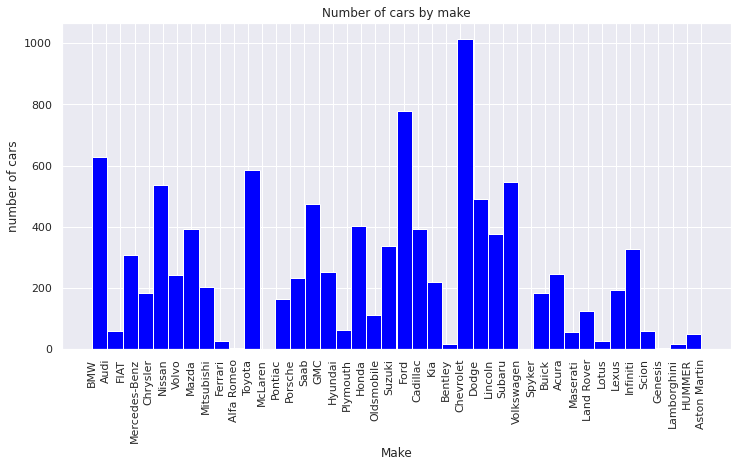

In [ ]:

plt.figure(figsize = (12,6))
plt.title('Number of cars by make')
plt.xlabel('Make')
plt.ylabel('number of cars')
plt.xticks(rotation=90)
plt.hist(df5.Make,bins=40, color = 'blue', edgecolor = 'white')



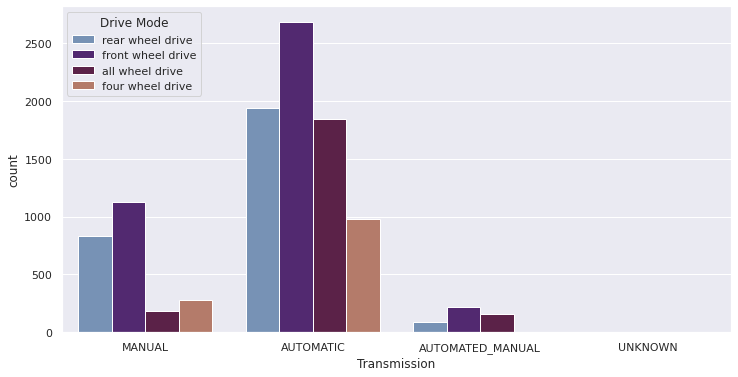

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x='Transmission',data=df5,hue='Drive Mode',hue_order=['rear wheel drive','front wheel drive','all wheel drive','four wheel drive'],palette='twilight');


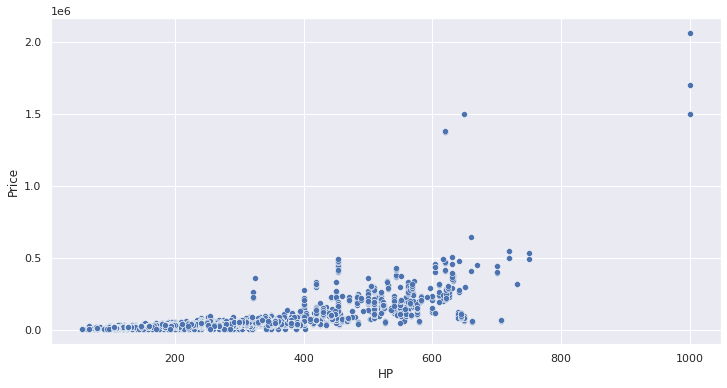

In [ ]:

plt.figure(figsize = (12,6))
sns.scatterplot(x ='HP', y = 'Price', data = df2)

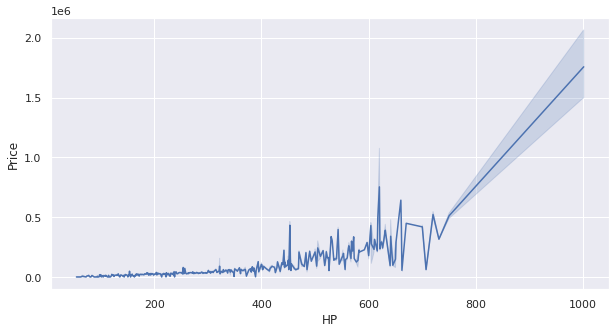

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(df2.HP,df2.Price)




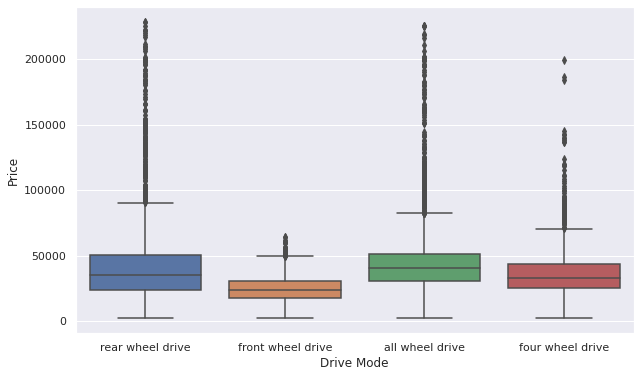

In [ ]:

plt.figure(figsize = (10,6))
sns.boxplot(x='Drive Mode',y='Price',data=df5)


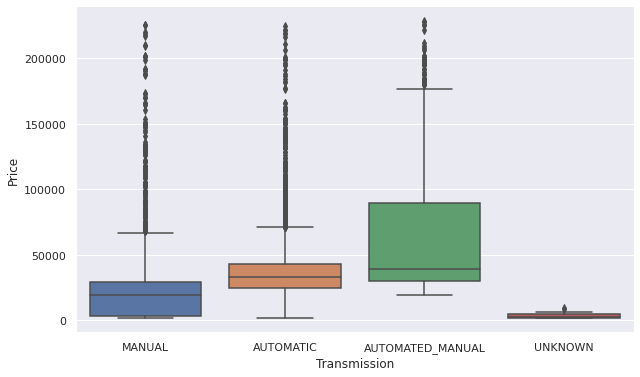

In [ ]:

plt.figure(figsize = (10,6))
sns.boxplot(x='Transmission',y='Price',data=df5)



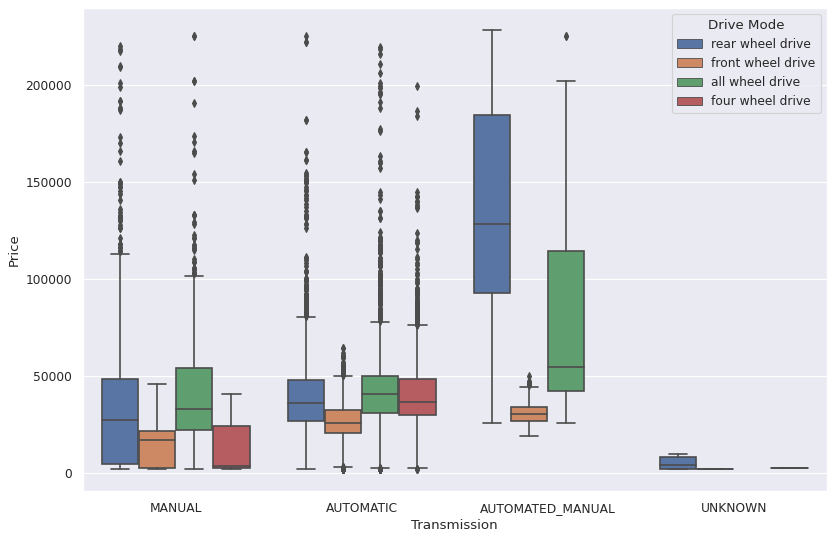

In [ ]:

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='Transmission',y='Price',hue='Drive Mode',data=df5)


In [ ]:
#Comment
automated manual  is most expensive than manual and automatic but the catche is front wheel drive of automated manual is less.

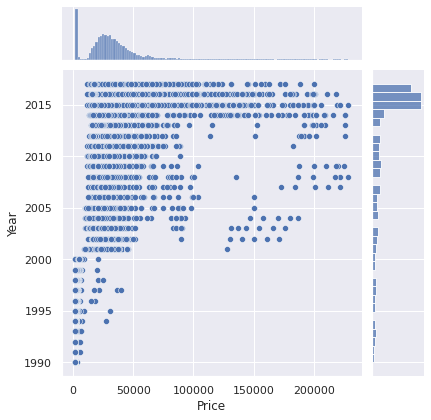

In [ ]:

sns.jointplot(x='Price',y='Year',data=df5)


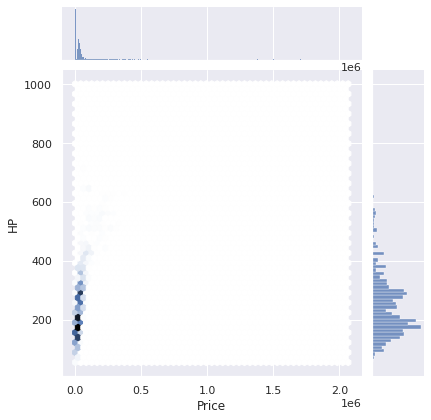

In [ ]:

sns.jointplot(x='Price',y='HP',kind='hex',data=df2)

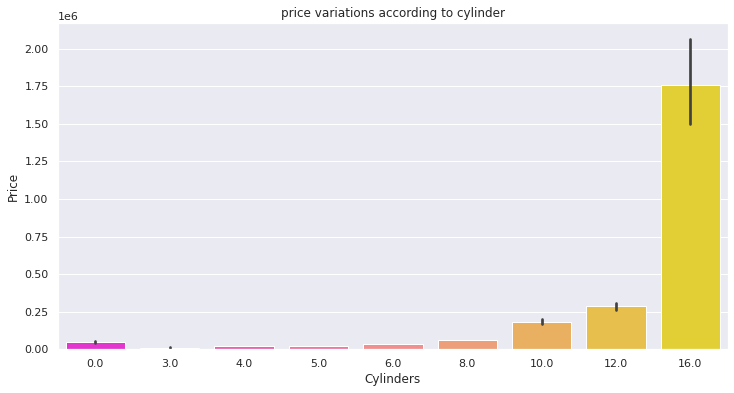

In [ ]:

from numpy import mean
plt.figure(figsize=(12,6))
plt.title('price variations according to cylinder')
sns.barplot(x = df2.Cylinders, y = df2.Price, estimator=mean,  palette='spring')


In [ ]:

plt.figure(figsize=(12,6))
plt.title('price variations according to cylinder')
sns.barplot(x = df2.Cylinders, y = df2.Transmission, estimator=mean,  palette='spring')


In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')



plt.title('price variations according to cylinder')
sns.barplot(x = 'Price', y = 'Transmission', estimator=mean, hue ='Drive Mode',data=df5, palette='summer')

# Multivariate Plots



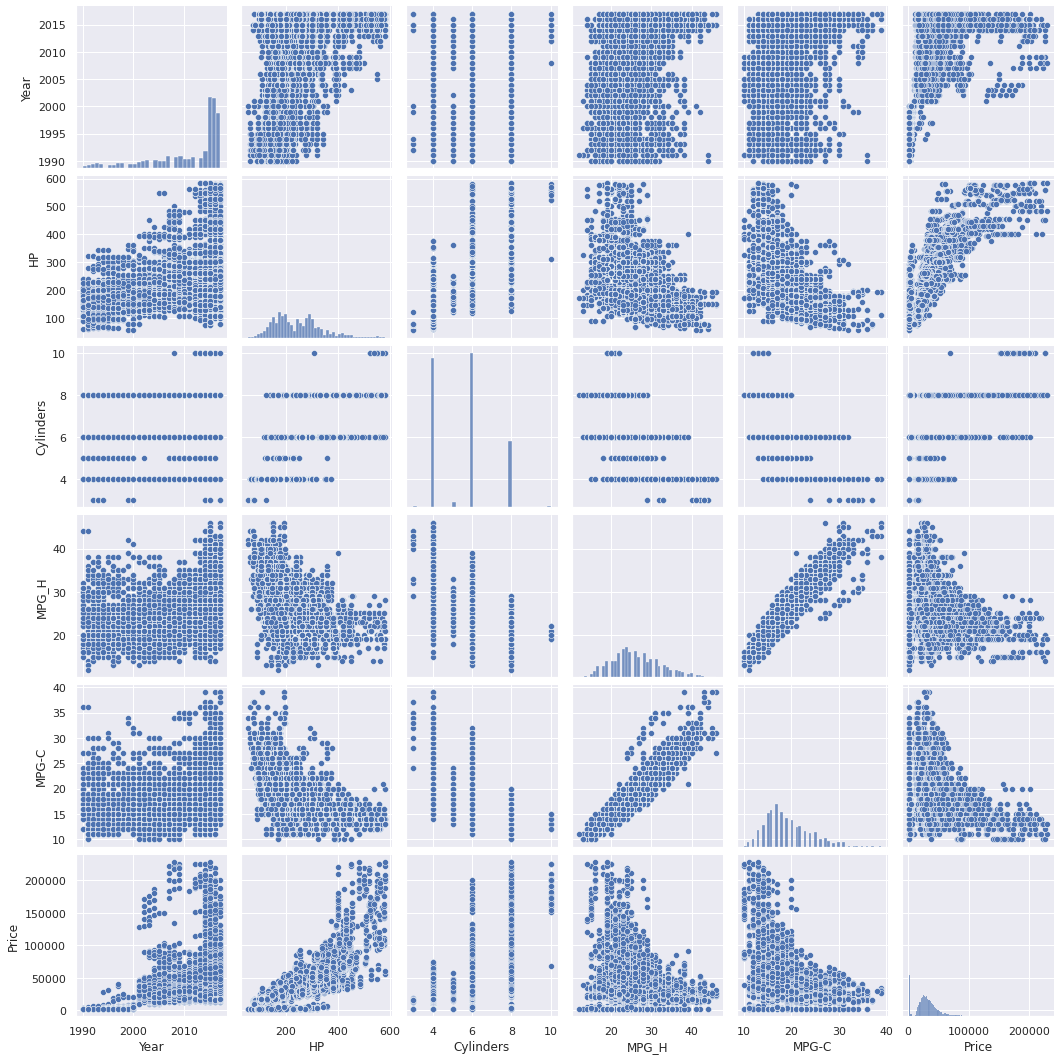

In [ ]:
sns.pairplot(data=df5)

<Figure size 1080x360 with 0 Axes>

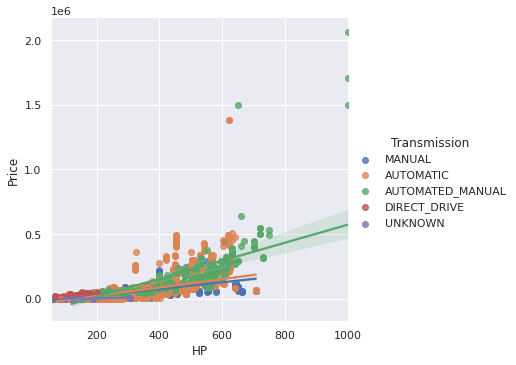

In [ ]:
plt.figure(figsize=(15,5))
sns.lmplot(x='HP',y='Price',hue='Transmission',data=df2)

Seems so interesting plot. You can clearly see in above output that the cost price increases for automated_manual transmission cars gradually

In [ ]:


l.remove('Price')



In [ ]:
l1=l.copy()
l1

['Year', 'HP', 'Cylinders', 'MPG_H', 'MPG-C']

In [ ]:
df2

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [ ]:
df5=df5.drop(['Make','Model','Transmission','Drive Mode'],axis=1)


In [ ]:
df5.head()

,Year,HP,Cylinders,MPG_H,MPG-C
0,2011,335.0,6.0,26,19
1,2011,300.0,6.0,28,19
2,2011,300.0,6.0,28,20
3,2011,230.0,6.0,28,18
4,2011,230.0,6.0,28,18


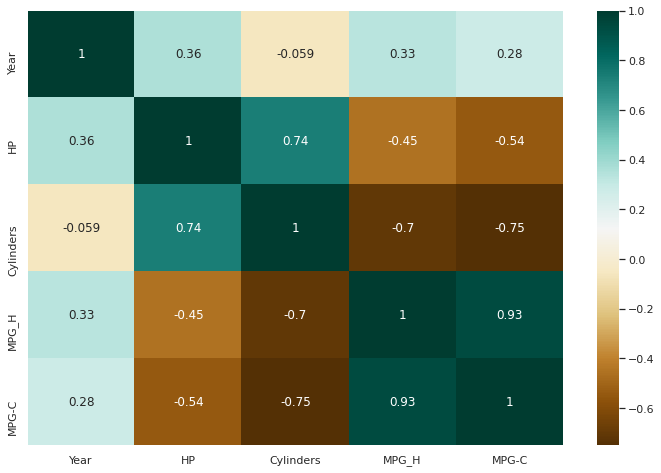

In [ ]:

plt.figure(figsize=(12,8))
sns.heatmap(df5.corr(),annot=True,cmap = 'BrBG')

 The above heatmap plot shows correlation between various variables in the colored scale of -1 to 1. 



